# Lecture 7: KNN and Decision Trees

These demos illustrate various aspects of KNN and decision tree classification. They also show how to use **built-in implementations of machine learning methods from scikit-learn**. This is very useful!

## Imports
Run this cell.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from sklearn.externals.six import StringIO  
#import pydot 
from subprocess import call

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Demo 1: Distance Functions
Run this code to set up plotting

In [3]:
#Create a desne grid of points on the unit scquare
xx, yy = np.meshgrid(np.arange(-1, 1,0.01), np.arange(-1,1,0.01))
xl = xx.flatten()
yl = yy.flatten()
xy = np.vstack((xl,yl)).T

def plot_distance_contours(dist):
    dl = dist.pairwise(xy,[[0,0]])
    dg = dl.reshape(xx.shape)
    plt.figure(1, figsize=(6, 5));
    CS=plt.contour(xx,yy,dg);
    plt.clabel(CS, inline=1, fontsize=10)
    plt.ylim((-1,1));
    plt.xlim((-1,1));
    plt.colorbar();
    plt.plot([0],[0],'ow');


## Visualizing different distance functions

There are a number of standard distance functions to choose from. Any one of them might be best for a particular application. We will look at three of them.

### Euclidean distance
The plot below shows the contours of $d(\mathbf{x}, 0)$, i.e, the distance of points in the plane from the origin, for the Euclidean distance function. (This is also the special case of Minkowski distance when $p=2$.)

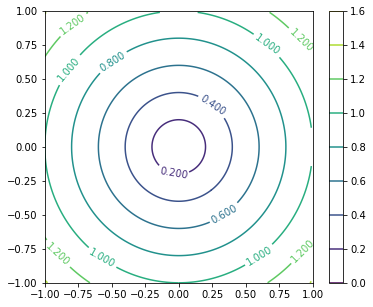

In [4]:
dist = DistanceMetric.get_metric('euclidean')
plot_distance_contours(dist)

### Manhattan distance
Here we see the distance of all points in the plane from the origin under the "Manhattan distance" ($p=1$)

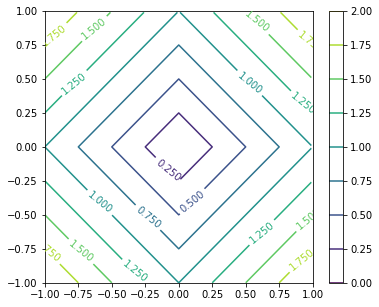

In [5]:
dist = DistanceMetric.get_metric('manhattan')
plot_distance_contours(dist)

### Chebyshev distance
We get another special case of the Minkowski distance called **Chebyshev distance** when $p \rightarrow \infty$. It looks like this.

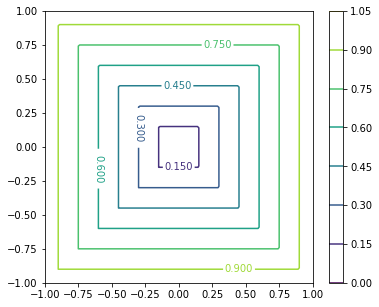

In [6]:
dist = DistanceMetric.get_metric('chebyshev')
plot_distance_contours(dist)

## Demo 2: KNN Classification in Action

### Setup
Run the code below to load and plot the seeds data set.

(210,)


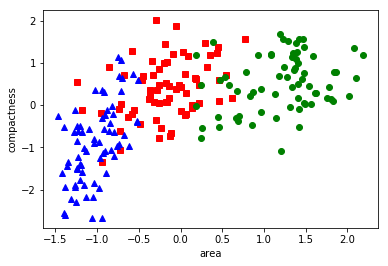

In [7]:
#Load Data
data = np.loadtxt('seeds_dataset.txt')
x = data[:,[0,2]]
y = data[:,-1]

x=x-np.mean(x,axis=0);
x=x/np.std(x,axis=0);

#x=x[[10,200],:]
#y=y[[10,200]]

#Plot data set 
labels=['sr','og','^b']
for i in [1,2,3]:
  plt.plot(x[y==i,0],x[y==i,1],labels[i-1]);
plt.xlabel('area');
plt.ylabel('compactness');
print(y.shape)

### Choose distance function and $k$

Select which cells below to run to choose from our three distance functions, and then select a value of $k$.

Use Euclidean Distance ($\ell_2$ norm): $||x-y||_2 = \sqrt{\sum_{d=1}^D (x_d-y_d)^2}$

In [8]:
metric='euclidean'

Use Manhattan Distance ($\ell_1$ norm): $||x-y||_1 = \sum_{d=1}^D |x_d-y_d|$

In [9]:
metric='manhattan'

Use Chebyshev Distance ($\ell_{\infty}$ norm): $||x-y||_{\infty} = \max_d |x_d-y_d|$

In [10]:
metric='chebyshev'

Select a number of Neighbors

In [11]:
K=200

### See the result

Run the code below to fit a classifier and visualize the result. The colored areas in the final plot show the predictions for different regions of the plane. Experiment with different choices of distance metric and values of $k$ to see how the predictions change.

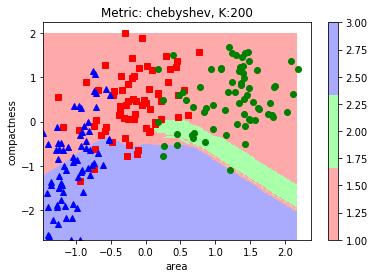

In [12]:
#Fit the specified classifier
clf = neighbors.KNeighborsClassifier(K, weights='uniform',metric=metric)
clf.fit(x, y)

#Prepare grid for plotting decision surface
gx1, gx2 = np.meshgrid(np.arange(min(x[:,0]), max(x[:,0]),(max(x[:,0])-min(x[:,0]))/200.0 ),
                         np.arange(min(x[:,1]), max(x[:,1]),(max(x[:,1])-min(x[:,1]))/200.0))
gx1l = gx1.flatten()
gx2l = gx2.flatten()
gx   = np.vstack((gx1l,gx2l)).T

#Compute a prediction for every point in the grid
gyhat = clf.predict(gx)
gyhat = gyhat.reshape(gx1.shape)

#Plot the results
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
for i in [1,2,3]:
  plt.plot(x[y==i,0],x[y==i,1],labels[i-1]);
plt.xlabel('area');
plt.ylabel('compactness');
plt.pcolormesh(gx1,gx2,gyhat,cmap=cmap_light)
plt.colorbar();
plt.axis('tight');
plt.title("Metric: %s, K:%d"%(metric,K));

### Convergence of KNN in the Infinite Data Limit

One of the nice properties of KNN is that it is guaranteed (under a suitable formalization of the problem) to converge to the "right answer" as the number of training examples goes to infinty.

Run the code below to set up a problem. The colored regions of the plane illustrate the "ground truth" --- i.e., the correct label for each point in the plane.

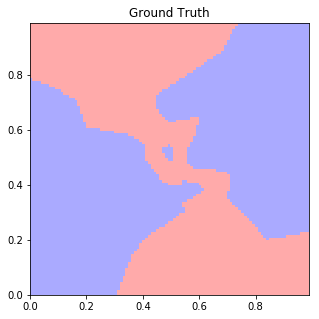

In [25]:
#Generate a Random Ground Truth Decision Boundary

#Get a random set of labeled points
xtrue,ytrue = datasets.make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, class_sep=0);
xtrue = xtrue - np.min(xtrue,axis=0);
xtrue = xtrue / np.max(xtrue,axis=0);

#Fit a KNN classifier to the points
clf_true = neighbors.KNeighborsClassifier(1, weights='uniform',metric='euclidean')
clf_true.fit(xtrue, ytrue)

#Prepare grid for plotting decision surface
gx1, gx2 = np.meshgrid(np.arange(0, 1,0.01 ),np.arange(0,1,0.01))
gx1l = gx1.flatten()
gx2l = gx2.flatten()
gx   = np.vstack((gx1l,gx2l)).T

#Compute the true classifier boundary
gytrue = clf_true.predict(gx)
gytrue = gytrue.reshape(gx1.shape)

#Plot the true decision surface
plt.figure(1,figsize=(5,5))
cmap_light = ListedColormap(['#FFAAAA','#AAAAFF'])
plt.pcolormesh(gx1,gx2,gytrue,cmap=cmap_light)
plt.title('Ground Truth');

### Observe that KNN can recover the ground truth

* Run the code below to fit KNN models and plot the resulting predictions for training sets of increasing size. 
* Observe that as the training set gets bigger, the KNN predictions converge to the ground truth.
* But note: KNN predictions with smaller datasets are very noisy. Other models can do better with small datasets.

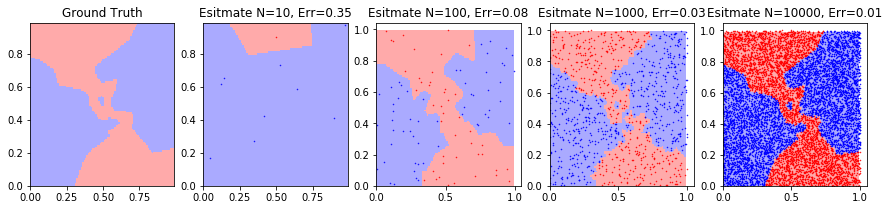

In [26]:
#Show convergence to ground truth

N=[10,100,1000,10000]

plt.figure(1,figsize=(3*(1+len(N)),3))
cmap_light = ListedColormap(['#FFAAAA','#AAAAFF'])
labels=['.r','.b']

#Plot ground truth
plt.subplot(1,1+len(N),1)
plt.pcolormesh(gx1,gx2,gytrue,cmap=cmap_light)
plt.axis('tight');
plt.title('Ground Truth');

for n in range(len(N)):

  #Sample and label a data set
  xsamp = np.random.rand(N[n],2)
  ysamp = clf_true.predict(xsamp)
  clf_est = neighbors.KNeighborsClassifier(1, weights='uniform',metric='euclidean')
  clf_est.fit(xsamp, ysamp)

  #Compute the estimated classifier boundary
  gyhat = clf_est.predict(gx)
  gyhat = gyhat.reshape(gx1.shape)

  err = np.sum(np.sum(np.abs(gyhat-gytrue)))/float(np.prod(gyhat.shape))  
    
  #Plot estimate
  plt.subplot(1,1+len(N),n+2)
  for i in [0,1]:
    plt.plot(xsamp[ysamp==i,0],xsamp[ysamp==i,1],labels[i],markersize=1);
  plt.pcolormesh(gx1,gx2,gyhat,cmap=cmap_light)
  plt.axis('tight');
  plt.title("Esitmate N=%d, Err=%.2f"%(N[n],err))

## Demo 3: Decision Trees

Now we will fit decision tree models to the same data set. Select parameters below for the splitting heuristic (either 'gini' or 'entropy') and stopping criteria (max_depth, min_samples_split).

In [29]:
criterion='gini';
#criterion='entropy';
max_depth=10;
min_samples_split=2;

### Fit and visualize the model

Now run this code to learn decision trees of increasing depth and visualize the predictions. This gives you a sense of how the recursive splitting proceeds.

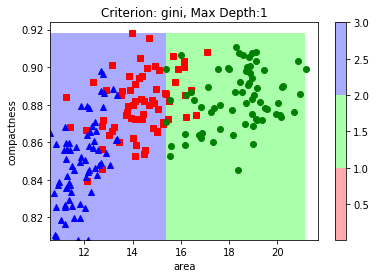

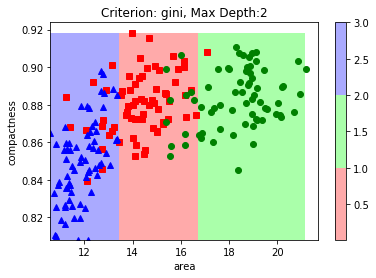

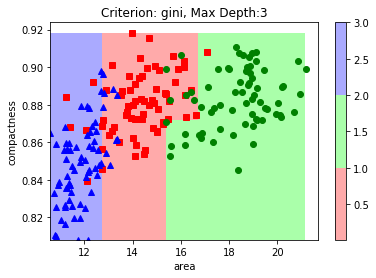

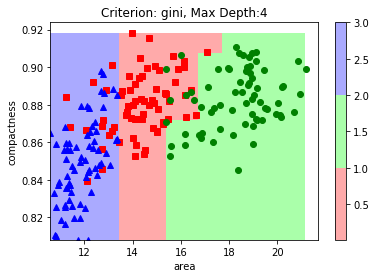

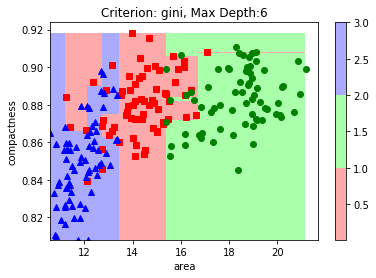

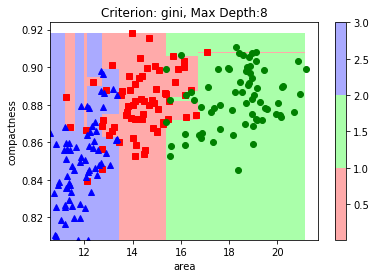

In [30]:
#Load Data
data = np.loadtxt('seeds_dataset.txt')
x = data[:,[0,2]]
y = data[:,-1]

#Prepare grid for plotting decision surface
gx1, gx2 = np.meshgrid(np.arange(min(x[:,0]), max(x[:,0]),(max(x[:,0])-min(x[:,0]))/200.0 ),
                     np.arange(min(x[:,1]), max(x[:,1]),(max(x[:,1])-min(x[:,1]))/200.0))
gx1l = gx1.flatten()
gx2l = gx2.flatten()
gx   = np.vstack((gx1l,gx2l)).T

for depth in np.hstack(([1,2,3],np.arange(4,max_depth,2))):

    #Fit the Decision Tree classifer and make predictions
    clf = tree.DecisionTreeClassifier(criterion=criterion, max_depth=depth,min_samples_split=min_samples_split )
    clf.fit(x, y)

    #Compute a prediction for every point in the grid
    gyhat = clf.predict(gx)
    gyhat = gyhat.reshape(gx1.shape)

    #Plot the results
    plt.figure(depth)
    labels=['sr','og','^b']
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    for i in [1,2,3]:
      plt.plot(x[y==i,0],x[y==i,1],labels[i-1]);
    plt.xlabel('area');
    plt.ylabel('compactness');
    plt.pcolormesh(gx1,gx2,gyhat,cmap=cmap_light);
    plt.colorbar();
    plt.clim(0.01,3)
    plt.axis('tight');
    plt.title("Criterion: %s, Max Depth:%d"%(criterion,depth));
    plt.show()
    
    #Plot the tree
    #requires pydot package
    #dot_data = StringIO();
    #tree.export_graphviz(clf,out_file=dot_data,
    #                         feature_names=['area','compactness']);
    #graph = pydot.graph_from_dot_data(dot_data.getvalue()); 
    #graph.write_pdf('seed%d.pdf'%(depth)) ;
